In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
x=np.random.uniform(0,1,100)

noise = np.random.normal(0,0.01,100)
y=np.sin(2*np.pi*x) + np.cos(2*np.pi*x) + noise
x=x.reshape(-1,1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

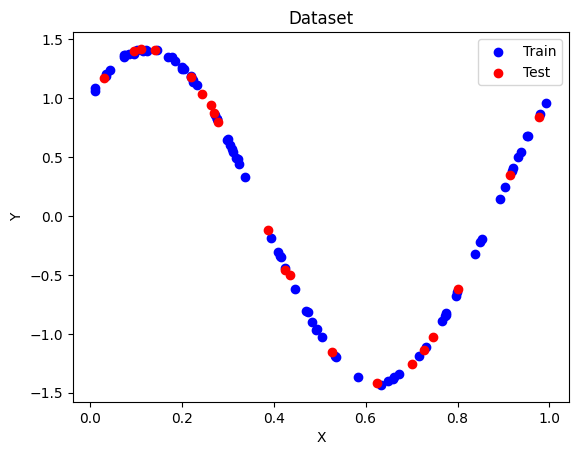

In [5]:
plt.scatter(x_train,y_train,color='blue',label="Train")
plt.scatter(x_test,y_test,color='red',label="Test")
plt.legend()
plt.title("Dataset")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [16]:
import numpy as np

class DecisionStumpRegressor:
    def __init__(self, loss_fn='mse'):
        self.threshold = None
        self.left_value = None
        self.right_value = None
        self.loss_fn = loss_fn

    def fit(self, X, y):
        thresholds = np.linspace(0, 1, 20)
        best_loss = float('inf')

        for thresh in thresholds:
            left_mask = X[:, 0] <= thresh
            right_mask = X[:, 0] > thresh
            if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                continue

            left_value = np.mean(y[left_mask])
            right_value = np.mean(y[right_mask])
            preds = np.where(left_mask, left_value, right_value)

            if self.loss_fn == 'mse':
                loss = np.mean((y - preds) ** 2)
            elif self.loss_fn == 'mae':
                loss = np.mean(np.abs(y - preds))
            else:
                raise ValueError("Loss must be 'mse' or 'mae'")

            if loss < best_loss:
                best_loss = loss
                self.threshold = thresh
                self.left_value = left_value
                self.right_value = right_value

    def predict(self, X):
        return np.where(X[:, 0] <= self.threshold, self.left_value, self.right_value)

def loss_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def gradient_mse(y_true, y_pred):
    return -(y_true - y_pred)

def loss_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def gradient_mae(y_true, y_pred):
    return -np.sign(y_true - y_pred)

def grad_boost_train(X, y, n_iters=100, learning_rate=0.01, loss='mse'):
    models = []
    losses = []
    preds = np.full_like(y, np.mean(y), dtype=float)

    if loss == 'mse':
        loss_fn = loss_mse
        grad_fn = gradient_mse
    elif loss == 'mae':
        loss_fn = loss_mae
        grad_fn = gradient_mae
    else:
        raise ValueError("Supported losses: 'mse', 'mae'")

    for _ in range(n_iters):
        residuals = grad_fn(y, preds)
        stump = DecisionStumpRegressor(loss_fn=loss)
        stump.fit(X, residuals)
        update = stump.predict(X)
        preds -= learning_rate * update
        losses.append(loss_fn(y, preds))
        models.append(stump)

    return models, losses, np.mean(y)

def predict_grad_boost(models, X, init_val, learning_rate=0.01):
    preds = np.full(X.shape[0], init_val)
    for model in models:
        preds -= learning_rate * model.predict(X)
    return preds


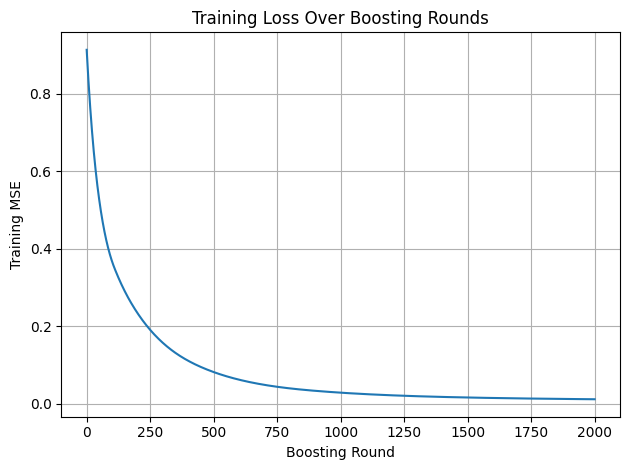

In [17]:
models, losses, init_val = grad_boost_train(x_train, y_train, n_iters=2000, learning_rate=0.01)

plt.plot(losses)
plt.xlabel("Boosting Round")
plt.ylabel("Training MSE")
plt.title("Training Loss Over Boosting Rounds")
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
y_test_pred = predict_grad_boost(models, x_test, init_val, learning_rate=0.01)

test_mse = np.mean((y_test - y_test_pred) ** 2)
print(f"Test MSE: {test_mse:.5f}")

Test MSE: 0.01627


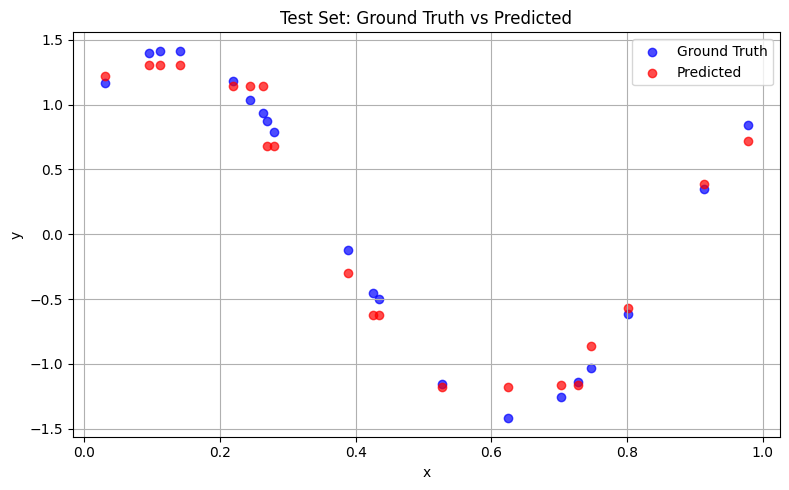

In [19]:
plt.figure(figsize=(8, 5))
plt.scatter(x_test, y_test, color='blue', label='Ground Truth', alpha=0.7)
plt.scatter(x_test, y_test_pred, color='red', label='Predicted', alpha=0.7)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Test Set: Ground Truth vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
y_train_pred = predict_grad_boost(models, x_train, init_val, learning_rate=0.01)

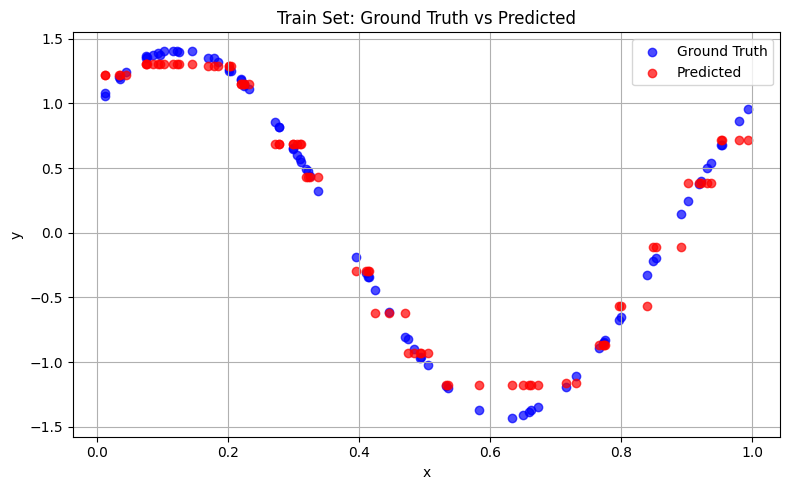

In [21]:
plt.figure(figsize=(8, 5))
plt.scatter(x_train, y_train, color='blue', label='Ground Truth', alpha=0.7)
plt.scatter(x_train, y_train_pred, color='red', label='Predicted', alpha=0.7)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Train Set: Ground Truth vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

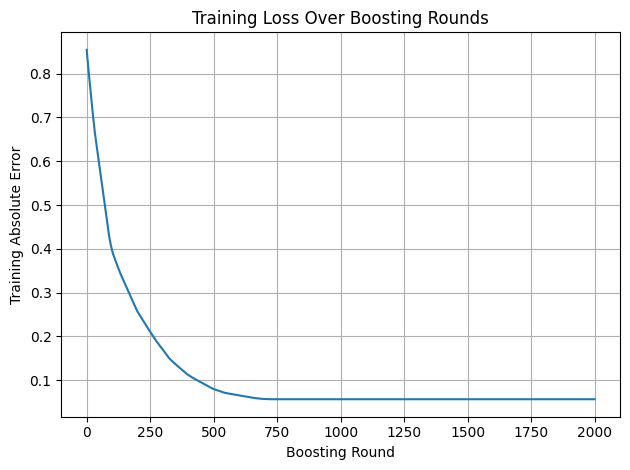

In [23]:
models, losses, init_val = grad_boost_train(x_train, y_train, n_iters=2000, learning_rate=0.01,loss='mae')

plt.plot(losses)
plt.xlabel("Boosting Round")
plt.ylabel("Training Absolute Error")
plt.title("Training Loss Over Boosting Rounds")
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
y_test_pred = predict_grad_boost(models, x_test, init_val, learning_rate=0.01)

test_mae = loss_mae(y_test, y_test_pred)
print('Test MAE: ', test_mae)

Test MAE:  0.0936804865123334


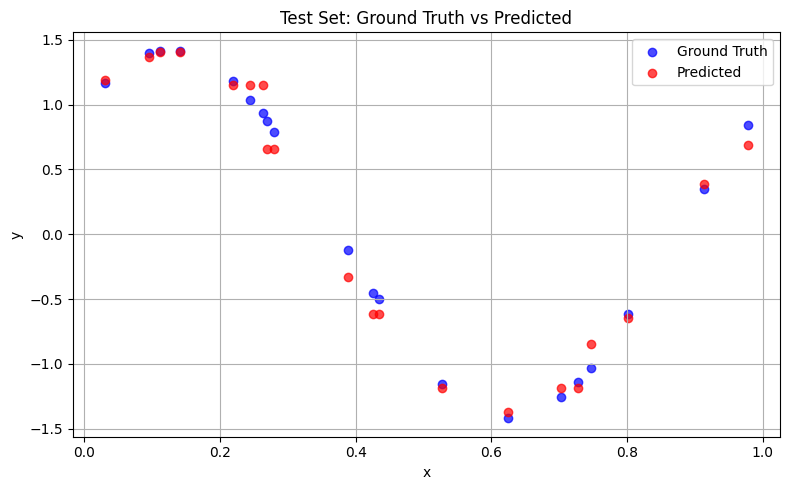

In [25]:
plt.figure(figsize=(8, 5))
plt.scatter(x_test, y_test, color='blue', label='Ground Truth', alpha=0.7)
plt.scatter(x_test, y_test_pred, color='red', label='Predicted', alpha=0.7)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Test Set: Ground Truth vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
y_train_pred = predict_grad_boost(models, x_train, init_val, learning_rate=0.01)

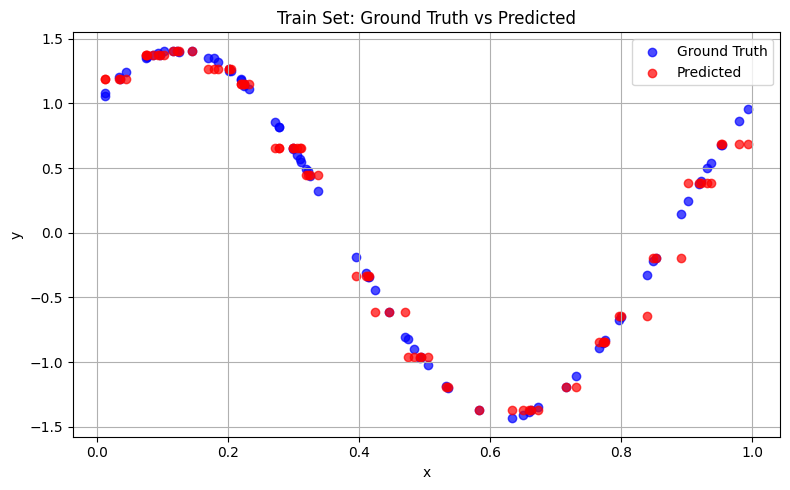

In [27]:
plt.figure(figsize=(8, 5))
plt.scatter(x_train, y_train, color='blue', label='Ground Truth', alpha=0.7)
plt.scatter(x_train, y_train_pred, color='red', label='Predicted', alpha=0.7)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Train Set: Ground Truth vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()